In [1]:
import sys
sys.path.append("..")

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from utils.evaultation.score.metrics import get_mean_reciprocal_rank, get_mean_precision_k, get_mean_ndcg_k, get_mean_latency
from utils.get_data_path import get_hnsw_path, get_data_path

In [4]:
### ALL HNSW Combinations
hnsw_m = [2**i for i in range(4, 10)]
hnsw_construct = [2**i for i in range(10)]
hnsw_search = [2**i for i in range(10)]

In [5]:
### Ground truth file path
gt_path = get_data_path("eval/gt/starbucks_vsm__type=gt.parquet")
gt_path

c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1
c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1\data\eval\gt


'c:\\Users\\user\\OneDrive\\Documents\\GitHub\\sc4020-project-1\\sc4020-project-1\\data\\eval\\gt\\starbucks_vsm__type=gt.parquet'

In [6]:
### Parent file var
parent_file = "2024-09-16_06-03-58"

### Generate Data DF

In [17]:
### Creating all combinations of construct and m

df_mp = pd.DataFrame({
    "m": [],
    "efConstruction": [],
    "efSearch": [],
    "mp_1": [],
    "mp_3": [],
    "mp_5": [],
    "mp_10": [],
    "mrr_1": [],
    "mrr_3": [],
    "mrr_5": [],
    "mrr_10": [],
    "ndcg_1": [],
    "ndcg_3": [],
    "ndcg_5": [],
    "ndcg_10": [],
    "latency": []
})

for x in hnsw_m:
    for y in hnsw_construct:
        for z in hnsw_search:
            path = get_hnsw_path("starbucks", parent_file, x, y, z) 
            df_mp.loc[len(df_mp)] = [
                x, y, z,
                get_mean_precision_k(gt_path, [path], 1, 10)[0],
                get_mean_precision_k(gt_path, [path], 3, 10)[0],
                get_mean_precision_k(gt_path, [path], 5, 10)[0],
                get_mean_precision_k(gt_path, [path], 10, 10)[0],
                get_mean_reciprocal_rank(gt_path, [path], 1)[0],
                get_mean_reciprocal_rank(gt_path, [path], 3)[0],
                get_mean_reciprocal_rank(gt_path, [path], 5)[0],
                get_mean_reciprocal_rank(gt_path, [path], 10)[0],
                get_mean_ndcg_k(gt_path, [path], 1)[0],
                get_mean_ndcg_k(gt_path, [path], 3)[0],
                get_mean_ndcg_k(gt_path, [path], 5)[0],
                get_mean_ndcg_k(gt_path, [path], 10)[0],
                get_mean_latency([path])[0]
            ]

c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1
c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1\data\eval\2024-09-16_06-03-58
c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1
c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1\data\eval\2024-09-16_06-03-58
c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1
c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1\data\eval\2024-09-16_06-03-58
c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1
c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1\data\eval\2024-09-16_06-03-58
c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1
c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1\data\eval\2024-09-16_06-03-58
c:\Users\user\OneDrive\Documents\GitHub\sc4020-project-1\sc4020-project-1
c:\Users\user\OneDrive\Documents\Git

In [18]:
df_mp

,m,efConstruction,efSearch,mp_1,mp_3,mp_5,mp_10,mrr_1,mrr_3,mrr_5,mrr_10,ndcg_1,ndcg_3,ndcg_5,ndcg_10,latency
0,16.0,1.0,1.0,0.68750,0.447917,0.30625,0.153125,0.15625,0.15625,0.15625,0.15625,0.15625,0.161798,0.189780,0.223577,9.65625
1,16.0,1.0,2.0,0.75000,0.489583,0.31875,0.159375,0.18750,0.18750,0.18750,0.18750,0.18750,0.173204,0.194367,0.231958,9.34375
2,16.0,1.0,4.0,0.87500,0.614583,0.45625,0.228125,0.28125,0.28125,0.28125,0.28125,0.28125,0.301486,0.315768,0.329658,9.93750
3,16.0,1.0,8.0,0.90625,0.718750,0.56250,0.303125,0.37500,0.37500,0.37500,0.37500,0.37500,0.371407,0.393914,0.411374,9.50000
4,16.0,1.0,16.0,0.93750,0.760417,0.60000,0.328125,0.43750,0.43750,0.43750,0.43750,0.43750,0.406642,0.425984,0.436330,9.65625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,512.0,512.0,32.0,1.00000,0.979167,0.97500,0.971875,1.00000,1.00000,1.00000,1.00000,1.00000,0.982734,0.977720,0.973488,10.06250
596,512.0,512.0,64.0,1.00000,0.979167,0.97500,0.971875,1.00000,1.00000,1.00000,1.00000,1.00000,0.982734,0.977720,0.973488,10.03125
597,512.0,512.0,128.0,1.00000,0.979167,0.97500,0.971875,1.00000,1.00000,1.00000,1.00000,1.00000,0.982734,0.977720,0.973488,10.37500
598,512.0,512.0,256.0,1.00000,0.979167,0.97500,0.971875,1.00000,1.00000,1.00000,1.00000,1.00000,0.982734,0.977720,0.973488,10.84375


# Mean Precision

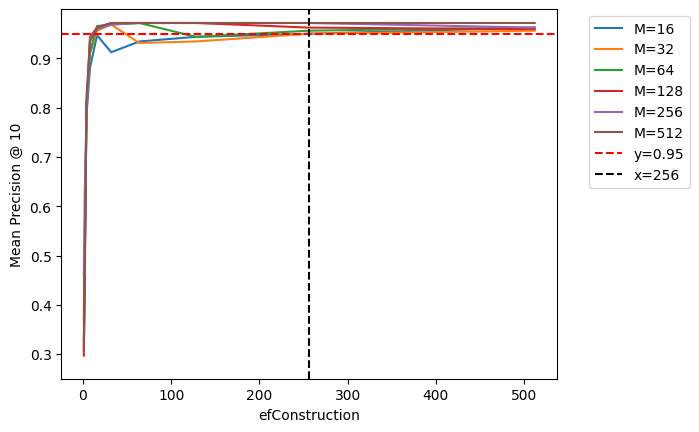

In [19]:
for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 16)]
    plt.plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")
    
plt.axhline(y=0.95, color='red', linestyle='--', label='y=0.95')
plt.axvline(x=256, color='black', linestyle='--', label='x=256')

plt.xlabel("efConstruction")
plt.ylabel("Mean Precision @ 10")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.0, 1, 0.1))
plt.ylim([0.25, 1])
plt.show()

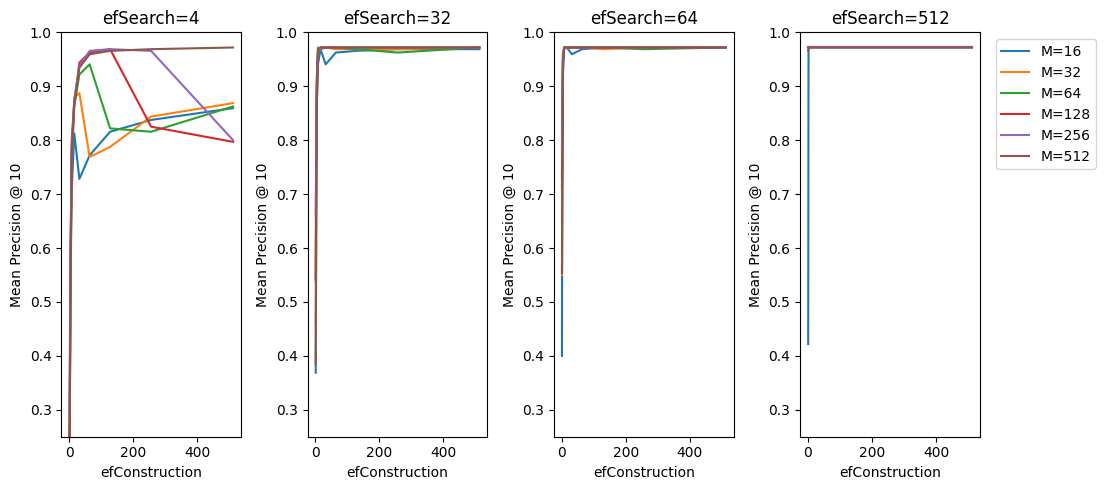

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Precision @ 10")
    a.set_ylim(0.25, 1)
    
ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")
    
plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

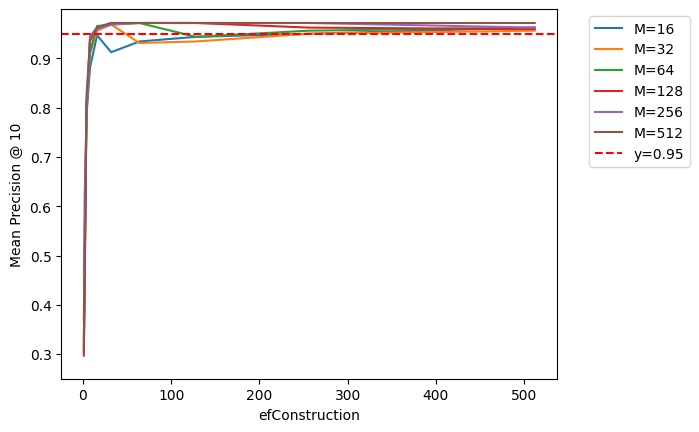

In [21]:
for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 16)]
    plt.plot(subset['efConstruction'], subset['mp_10'], label=f"M={m_val}")

plt.axhline(y=0.95, color='red', linestyle='--', label='y=0.95')

plt.xlabel("efConstruction")
plt.ylabel("Mean Precision @ 10")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.0, 1, 0.1))
plt.ylim([0.25, 1])
plt.show()

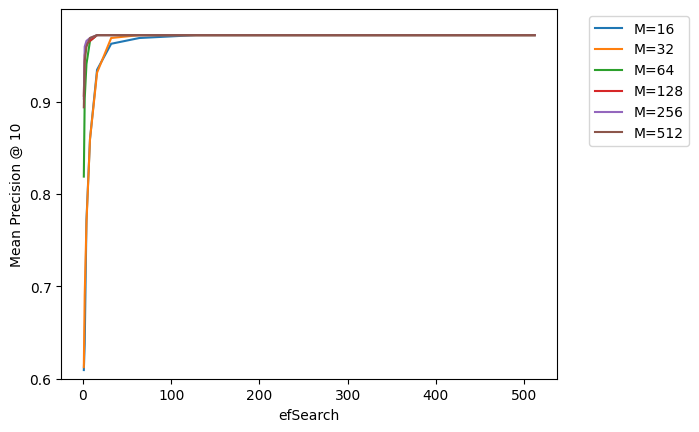

In [22]:
for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efConstruction == 64)]
    plt.plot(subset['efSearch'], subset['mp_10'], label=f"M={m_val}")

plt.xlabel("efSearch")
plt.ylabel("Mean Precision @ 10")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.0, 1, 0.1))
plt.ylim([0.6, 1])
plt.show()

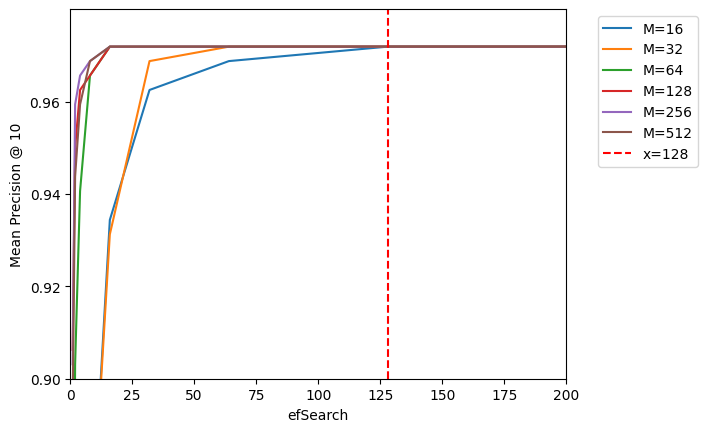

In [23]:
for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efConstruction == 64)]
    plt.plot(subset['efSearch'], subset['mp_10'], label=f"M={m_val}")

plt.xlabel("efSearch")
plt.ylabel("Mean Precision @ 10")

plt.axvline(x=128, color='red', linestyle='--', label='x=128')

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.0, 0.98, 0.02))
plt.ylim([0.9, 0.98])
plt.xlim([0, 200])
plt.show()

# Mean Reciprocal Rank

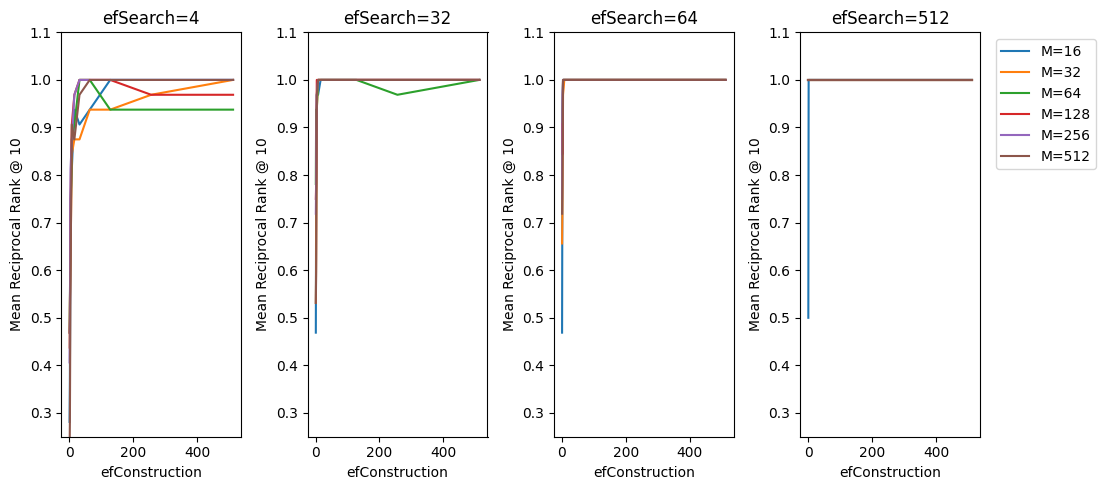

In [24]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['mrr_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['mrr_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['mrr_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['mrr_10'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Reciprocal Rank @ 10")
    a.set_ylim(0.25, 1.1)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# nDCG

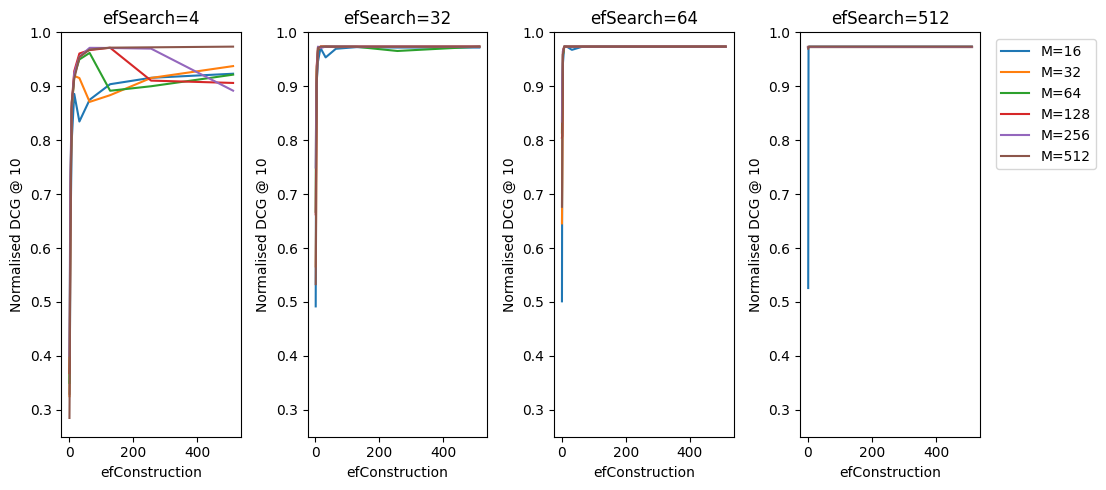

In [25]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['ndcg_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['ndcg_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['ndcg_10'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['ndcg_10'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Normalised DCG @ 10")
    a.set_ylim(0.25, 1)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Latency

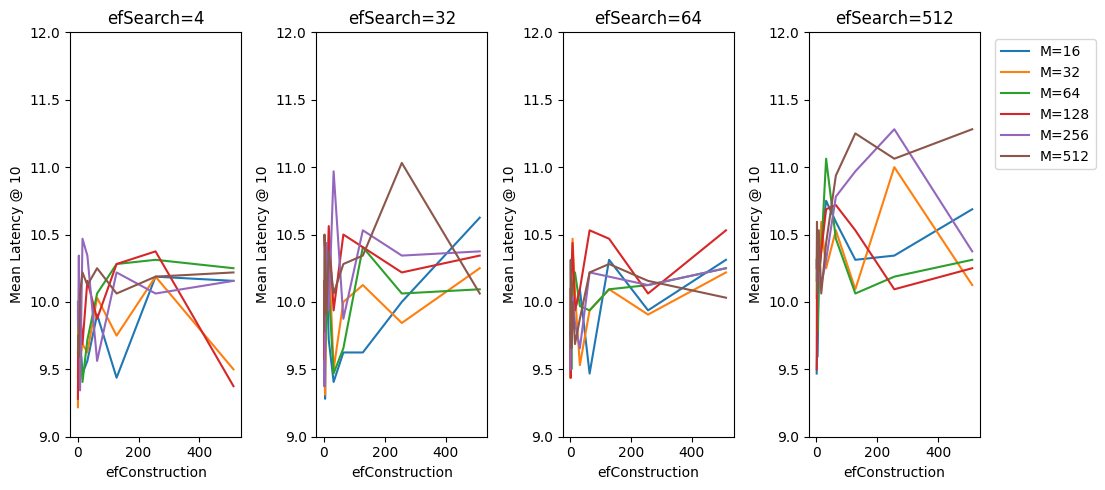

In [26]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 4)]
    ax[0].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 32)]
    ax[1].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 64)]
    ax[2].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for m_val in hnsw_m:
    subset = df_mp[(df_mp.m == m_val) & (df_mp.efSearch == 512)]
    ax[3].plot(subset['efConstruction'], subset['latency'], label=f"M={m_val}")

for a in ax:
    a.set_xlabel("efConstruction")
    a.set_ylabel("Mean Latency @ 10")
    a.set_ylim(9, 12)

ax[0].set_title("efSearch=4")
ax[1].set_title("efSearch=32")
ax[2].set_title("efSearch=64")
ax[3].set_title("efSearch=512")

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()